In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data #

In [4]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
y = train.Transported
df = pd.concat([train.drop('Transported', axis=1), test])

In [8]:
df.shape

(12970, 13)

In [9]:
train.shape

(8693, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


## Missing data ##

In [11]:
percentage_missing_data = (df.isnull().sum().sort_values()/len(df))*100
percentage_missing_data

PassengerId     0.000000
RoomService     2.027756
VRDeck          2.066307
Age             2.081727
Destination     2.112567
Spa             2.189668
HomePlanet      2.220509
FoodCourt       2.228219
Name            2.266769
VIP             2.282190
Cabin           2.305320
ShoppingMall    2.359291
CryoSleep       2.390131
dtype: float64

<AxesSubplot:xlabel='Transported', ylabel='count'>

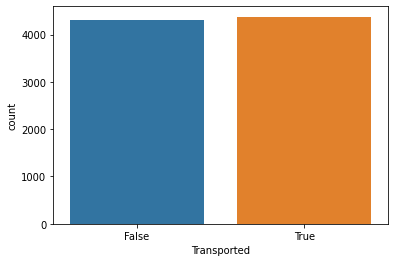

In [12]:
sns.countplot(x=y)

Let's deal first with the numeric missing data and apply feature engineering.

In [13]:
df.select_dtypes(include='float64').columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

<AxesSubplot:>

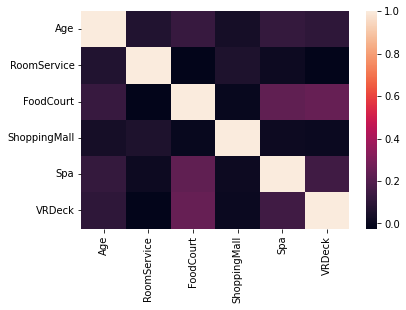

In [14]:
sns.heatmap(df.select_dtypes(include='float64').corr())

In [15]:
df.Age.value_counts()

18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

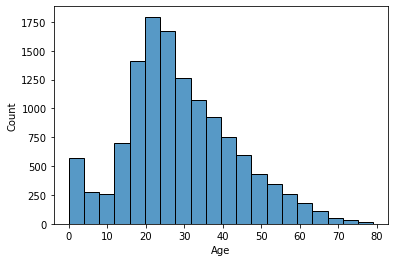

In [16]:
sns.histplot(data=df.Age, bins=20,)

In [17]:
df.select_dtypes(include='float64').groupby('Age').count()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,,,,,
0.0,255,257,251,255,251
1.0,91,93,91,89,93
2.0,104,109,106,109,107
3.0,107,105,107,106,109
4.0,90,84,91,89,89
...,...,...,...,...,...
75.0,6,6,6,5,6
76.0,2,2,2,2,2
77.0,3,2,3,3,3


<AxesSubplot:xlabel='Age'>

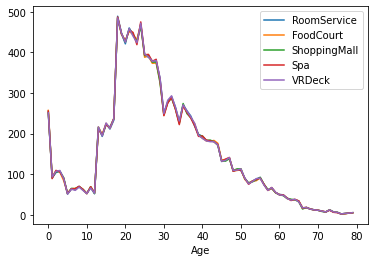

In [18]:
df.select_dtypes(include='float64').groupby('Age').count().plot()

<AxesSubplot:>

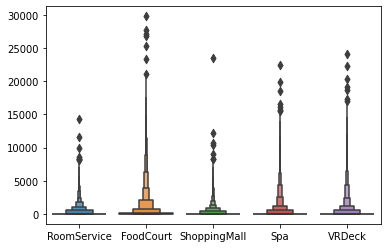

In [19]:
sns.boxenplot(data=df.drop(['CryoSleep','Age','VIP'],axis=1))

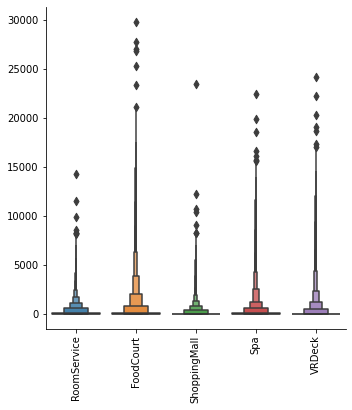

In [20]:
sns.catplot(data=df.drop(['CryoSleep','Age','VIP'],axis=1), kind='boxen')
plt.xticks(rotation=90);

In [21]:
df.FoodCourt

0          0.0
1          9.0
2       3576.0
3       1283.0
4         70.0
         ...  
4272       0.0
4273     847.0
4274       0.0
4275    2680.0
4276       0.0
Name: FoodCourt, Length: 12970, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

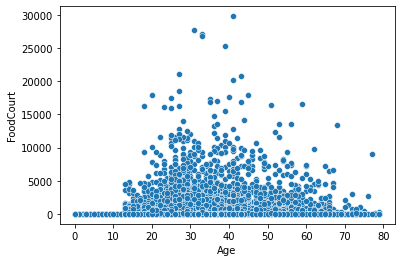

In [22]:
sns.scatterplot(data=df, x=df.Age, y=df.FoodCourt)

In [23]:
df.Age.describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

In [24]:
df.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
4272    34.0
4273    42.0
4274     NaN
4275     NaN
4276    43.0
Name: Age, Length: 12970, dtype: float64

In [25]:
df.groupby('Age').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Age,,,,,,,,,,,,
0.0,260,257,256,255,254,254,255,257,251,255,251,250
1.0,94,92,91,91,93,94,91,93,91,89,93,93
2.0,110,107,104,105,109,109,104,109,106,109,107,103
3.0,109,107,106,108,109,103,107,105,107,106,109,107
4.0,91,90,88,90,89,90,90,84,91,89,89,90
...,...,...,...,...,...,...,...,...,...,...,...,...
75.0,6,6,6,5,6,6,6,6,6,5,6,6
76.0,2,2,2,2,2,2,2,2,2,2,2,2
77.0,3,3,3,3,3,3,3,2,3,3,3,3


<AxesSubplot:xlabel='Age', ylabel='count'>

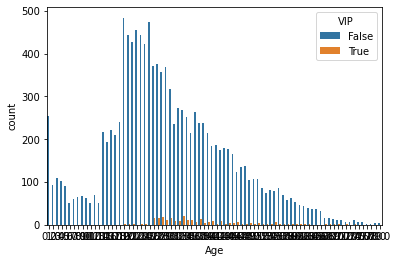

In [26]:
sns.countplot(data=df, x=df.Age, hue=df.VIP)

In [27]:
df.select_dtypes(include='object').columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')